In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv('data.csv')

# remove other status
# df = df[df['status'].str.contains('healthy') | df['status'].str.contains('COVID-19') ].copy(deep=True)

X = np.array(df[df.columns[-42:]])
# extract labels
y = np.array(df['status'])

y[y=='healthy'] = int(0) # not covid
y[(y=='symptomatic') | (y=='COVID-19')] = int(1) # covid
y = y.astype('int')

# Hanlde imbalanced dataset by upsampling minority class
upsampler = SMOTE()
X_SMOTE, y_SMOTE = upsampler.fit_resample(X, y)

X_train, X_test, Y_train, Y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.3)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
df = pd.read_csv('data.csv')

# remove other status
# df = df[df['status'].str.contains('healthy') | df['status'].str.contains('COVID-19') ].copy(deep=True)

X = np.array(df[df.columns[-42:]])
# extract labels
y = np.array(df['status'])

y[y=='healthy'] = int(0) # not covid
y[(y=='symptomatic') | (y=='COVID-19')] = int(1) # covid
y = y.astype('int')

# Fix imbalanced dataset by upsampling minority class
upsampler = SMOTE()
#X_train, Y_train = SMOTE.fit_resample(X_train, Y_train)
X_SMOTE, y_SMOTE = upsampler.fit_resample(X, y)

X_train, X_test, Y_train, Y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.3)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
[np.sum(y==int(1))/y.shape[0], np.sum(y==int(0))/y.shape[0]]

[0.23919308357348704, 0.760806916426513]

In [5]:
[np.sum(Y_train==int(1))/Y_train.shape[0], np.sum(Y_train==int(0))/Y_train.shape[0]]

[0.5046602525556224, 0.49533974744437764]

In [7]:
# define REAL feature names e.g., EEPD_1, EEPD_2, MFMC_1,
feature_names = df.columns[-42:]
feature_names
# feature_names = ['EEPD_1', 'EEPD_2', ...]

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'feature19', 'feature20', 'feature21',
       'feature22', 'feature23', 'feature24', 'feature25', 'feature26',
       'feature27', 'feature28', 'feature29', 'feature30', 'feature31',
       'feature32', 'feature33', 'feature34', 'feature35', 'feature36',
       'feature37', 'feature38', 'feature39', 'feature40', 'feature41',
       'feature42'],
      dtype='object')

In [8]:
# Add tSNE plot
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_train)
df = pd.DataFrame()
df["y"] = Y_train
df.loc[df["y"]==0]= 'Healthy'
df.loc[df["y"]==1]= 'COVID'
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

/opt/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6652 samples in 0.003s...
[t-SNE] Computed neighbors for 6652 samples in 0.832s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6652
[t-SNE] Computed conditional probabilities for sample 2000 / 6652
[t-SNE] Computed conditional probabilities for sample 3000 / 6652
[t-SNE] Computed conditional probabilities for sample 4000 / 6652
[t-SNE] Computed conditional probabilities for sample 5000 / 6652
[t-SNE] Computed conditional probabilities for sample 6000 / 6652
[t-SNE] Computed conditional probabilities for sample 6652 / 6652
[t-SNE] Mean sigma: 1.234344
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.217751
[t-SNE] KL divergence after 1000 iterations: 1.845180


[Text(0.5, 1.0, 'COUGHVID Features T-SNE projection')]

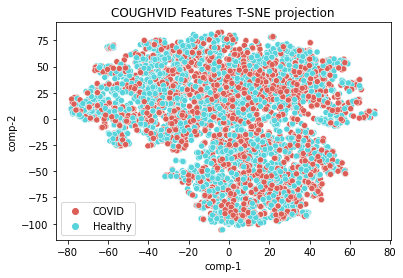

In [9]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="COUGHVID Features T-SNE projection") 

### Train a Random Forest Model

In [8]:
rfc = RandomForestClassifier(random_state=0)
#rfc = RandomForestClassifier(n_estimators= 25, random_state=0)

rfc = rfc.fit(X_train,Y_train)

score_train = rfc.score(X_train,Y_train)
score_test = rfc.score(X_test,Y_test)
# f1 score, precision, recall

print("Random Forest accuracy: train {:.3f}, test {:.3f}".format(score_train, score_test))

Random Forest accuracy: train 1.000, test 0.791


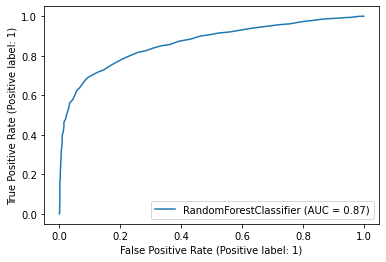

In [9]:
y_pred = rfc.predict_proba(X_test)
# plot roc curve
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, Y_test)
plt.show()

/opt/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


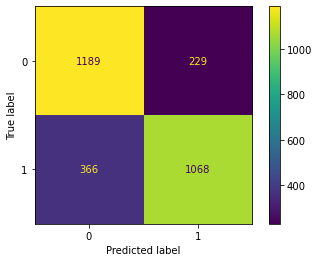

In [10]:
plot_confusion_matrix(rfc, X_test, Y_test) 

In [20]:
tp = 1068
tn = 1189
fp = 229
fn = 366

precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)

f1 = 2* precision*recall/(precision + recall)

print("precision: {:.3f}, recall: {:.3f}, accuracy: {:.3f}, f1: {:.3f}".format(precision, recall, accuracy, f1))

precision: 0.823, recall: 0.745, accuracy: 0.791, f1: 0.782


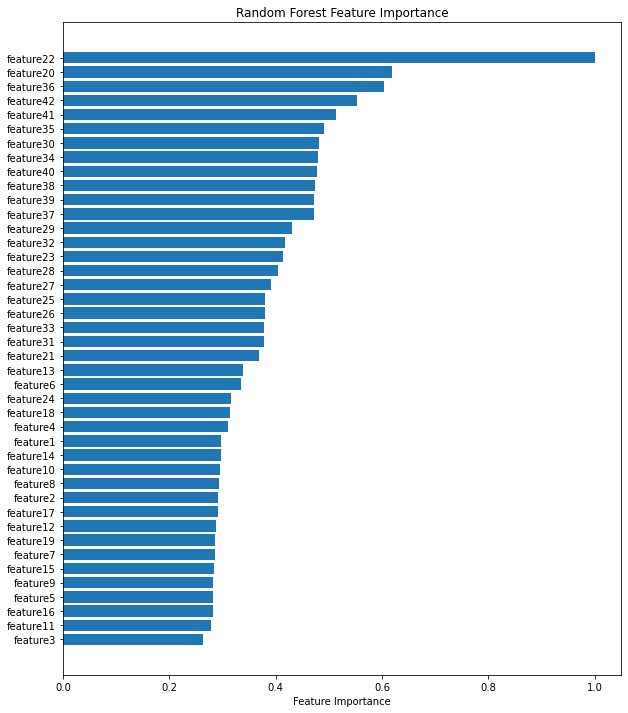

In [11]:
# plot feature importance
sorted_idx = rfc.feature_importances_.argsort()
plt.figure(figsize = (10,12))
plt.barh(feature_names[sorted_idx], rfc.feature_importances_[sorted_idx]/max(rfc.feature_importances_))
plt.xlabel("Feature Importance")
plt.title('Random Forest Feature Importance')
plt.show()

In [12]:
# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, X_train, Y_train, cv=5)
scores

array([0.7768595 , 0.75957926, 0.80977444, 0.78947368, 0.78947368])

In [10]:
a = np.array([0.7768595 , 0.75957926, 0.80977444, 0.78947368, 0.78947368])

[np.mean(a), np.std(a)]


[0.785032112, 0.016530439251836466]

### Train Logistic Regression

In [13]:
clf = LogisticRegression(solver = 'lbfgs', max_iter=1000)

clf.fit(X_train,Y_train) 
y_pred = clf.predict(X_test) 

clf.predict(X_train[0:10])
predictions = clf.predict(X_train)

score = clf.score(X_train, Y_train)
print(score)

score = clf.score(X_test, Y_test)
print(score)


0.5735117257967528
0.5620617110799438


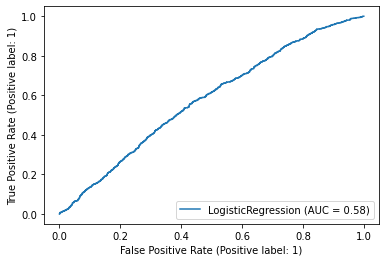

In [14]:
y_pred = clf.predict_proba(X_test)
# plot roc curve
clf_disp = RocCurveDisplay.from_estimator(clf, X_test, Y_test)
plt.show()

### Train SVM (try different kernels)

In [15]:
#clf = svm.SVC(kernel='linear')
clf = svm.SVC(kernel='rbf', probability=True)

clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)


In [16]:
from sklearn import metrics
print("Training Accuracy:", metrics.accuracy_score(Y_train, y_pred_train))
print("Testing Accuracy:", metrics.accuracy_score(Y_test, y_pred))


Training Accuracy: 0.716025255562237
Testing Accuracy: 0.6420056100981767


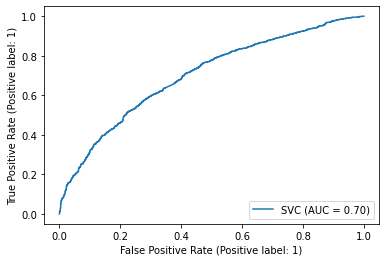

In [17]:
y_pred = clf.predict_proba(X_test)
# plot roc curve
clf_disp = RocCurveDisplay.from_estimator(clf, X_test, Y_test)
plt.show()

### Train Naive Bayes

In [18]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
print("Naive Bayes score training: ",nb.score(X_train, Y_train))
print("Naive Bayes score testing: ",nb.score(X_test, Y_test))

Naive Bayes score training:  0.5470535177390259
Naive Bayes score testing:  0.5469845722300141


In [19]:
# Train AdaBoost
from sklearn.ensemble import AdaBoostClassifier
rfc  = AdaBoostClassifier(n_estimators= 500)

rfc = rfc.fit(X_train,Y_train)

score_train = rfc.score(X_train,Y_train)
score_test = rfc.score(X_test,Y_test)
# f1 score, precision, recall

print("AdaBoost accuracy: train {:.3f}, test {:.3f}".format(score_train, score_test))

AdaBoost accuracy: train 0.827, test 0.759
